In [3]:
import numpy as np
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt
import mesa_reader as mr
from mesa_reader import MesaData


In [28]:
h1 = np.genfromtxt('../../Python/output_data_paper/donor_entropy_approx21plusco56_normalhelium.dat',skip_header=1)
#h2 = np.genfromtxt('../entropy_normal_2.0_HELM.dat',skip_header=0)
h3 = mr.MesaData('../../../KavliSP23/Test_Ni_entropy/Relax_WD_2/WD_01,1.mod')
h4 = mr.MesaData('../../../KavliSP23/Test_Ni_entropy/Relax_WD_2/WD_064.mod')
h5 = mr.MesaData('../../../KavliSP23/Test_Ni_entropy/Relax_WD_2/WD_095.mod')


In [10]:
def create_interpolation_function(original_m, original_entropy):
    interpolation_function = interp1d(original_m, original_entropy, kind='linear', fill_value="extrapolate")
    return interpolation_function

In [11]:
#Interpolating functions for entropy using older mass coordinates
entropy=create_interpolation_function((h2[:,0])*0.64,h2[:,1])
temp=create_interpolation_function((1.000-h1[:,0])*0.64,h1[:,2]/1e7)


In [12]:
new_m = np.linspace(0., 0.64, 970)  #New mass coordinate range
#New entropies
new_entropy = entropy(new_m)
new_temp = temp(new_m)


In [21]:

plt.rc('font', family='serif')
plt.rcParams['text.usetex'] = False
fs = 24

# update various fontsizes to match
params = {'figure.figsize': (12, 8),
          'legend.fontsize': 0.6*fs,
          'axes.labelsize': 1*fs,
          'axes.titlesize': 0.8*fs,
          'xtick.labelsize': 0.8 * fs,
          'ytick.labelsize': 0.8 * fs,
          'axes.linewidth': 1.1,
          'lines.linestyle':"--",
          'xtick.major.size': 7,
          'xtick.minor.size': 4,
          'ytick.major.size': 7,
          'ytick.minor.size': 4}
plt.rcParams.update(params)


Text(0, 0.5, 'logT (K)')

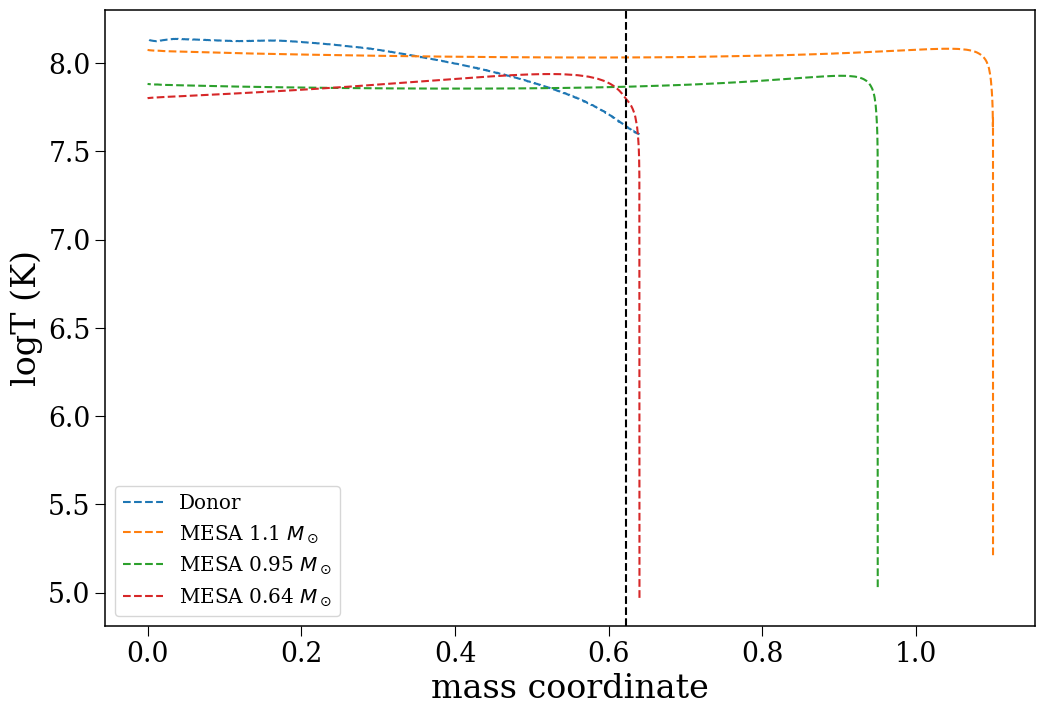

In [29]:
#Original from file
fig,ax=plt.subplots(figsize=(12,8))
plt.plot((1-h1[:,0])*0.64,np.log10(h1[:,2]))
plt.plot((1.00-h3.dq.cumsum())*1.1, np.log10(2.71828)*h3.lnT)
plt.plot((1.00-h5.dq.cumsum())*0.95, np.log10(2.71828)*h5.lnT)
plt.plot((1.00-h4.dq.cumsum())*0.64, np.log10(2.71828)*h4.lnT)
ax.axvline(x=0.623,color='black',linestyle='--')
#ax.axvline(x=h2[962,0]*0.64,color='black',linestyle='--')
plt.legend(["Donor","MESA 1.1 $M_\odot$","MESA 0.95 $M_\odot$","MESA 0.64 $M_\odot$"])
plt.xlabel("mass coordinate")
plt.ylabel("logT (K)")



Text(0.5, 0, 'mass coordinate')

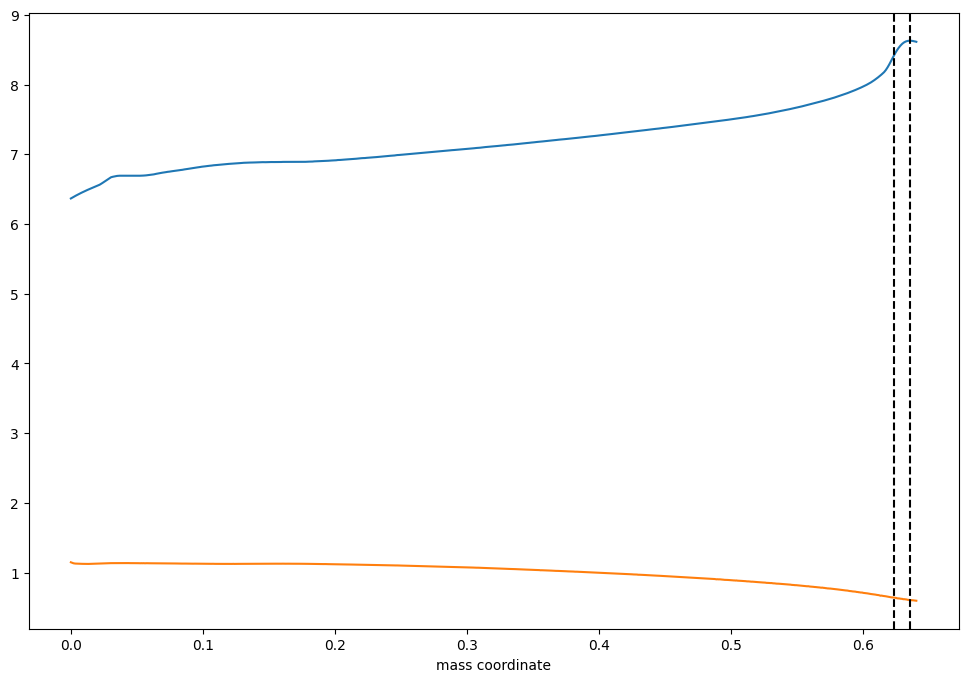

In [14]:
#Original from file
fig,ax=plt.subplots(figsize=(12,8))
ax.plot((new_m),np.log10(new_entropy))
ax.plot((new_m),np.log10(new_temp))
ax.axvline(x=0.623,color='black',linestyle='--')
ax.axvline(x=h2[962,0]*0.64,color='black',linestyle='--')
plt.xlabel("mass coordinate")



In [15]:
from scipy.signal import savgol_filter
new_temp_smooth=savgol_filter(new_temp,31,3)  #Smoothing the difference of entropies

In [16]:
rescaled_entropy=new_temp_smooth*new_entropy  #The rescaled new entropy

In [17]:
ind_min=np.where(new_m>=0.623)
print(ind_min[0][0])
rescaled_entropy[ind_min[0][0]:]=rescaled_entropy[ind_min[0][0]]

944


Text(0.5, 0, 'mass coordinate')

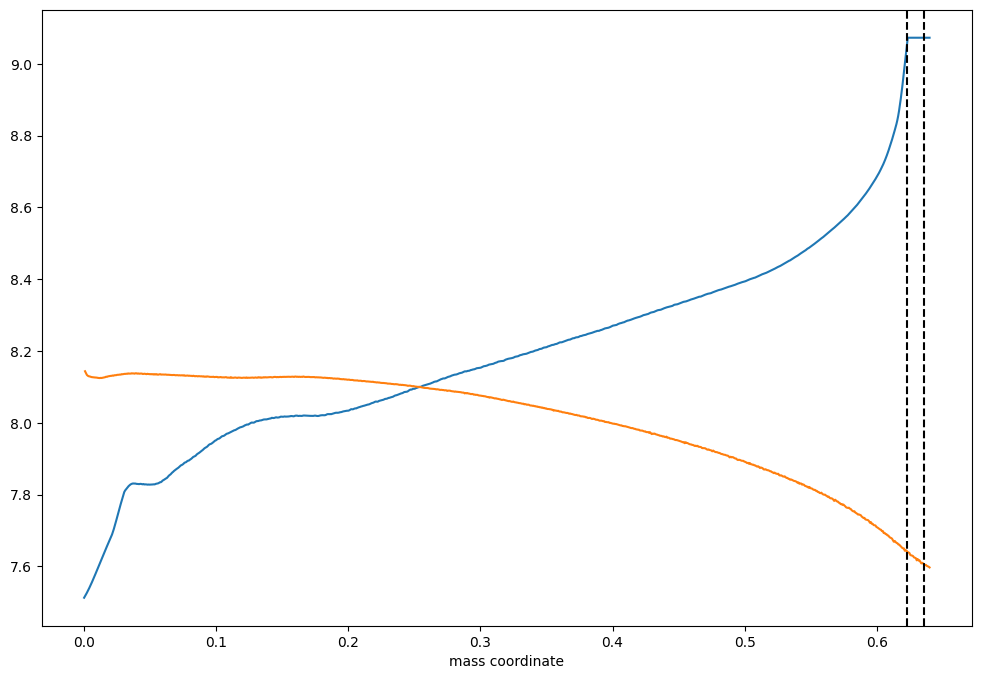

In [18]:
#Original from file
fig,ax=plt.subplots(figsize=(12,8))
ax.plot((new_m),np.log10(rescaled_entropy))
ax.plot((1-h1[:,0])*0.64,np.log10(h1[:,2]))
ax.axvline(x=0.623,color='black',linestyle='--')
ax.axvline(x=h2[962,0]*0.64,color='black',linestyle='--')
plt.xlabel("mass coordinate")



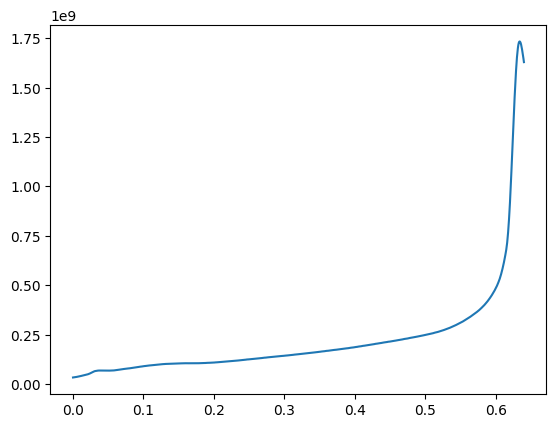

In [19]:
plt.plot(new_m,new_temp_smooth*new_entropy)


In [20]:
q_zones=1-new_m/0.64
q_zones=q_zones/q_zones.max()
print(q_zones)







[1.         0.99896801 0.99793602 0.99690402 0.99587203 0.99484004
 0.99380805 0.99277606 0.99174407 0.99071207 0.98968008 0.98864809
 0.9876161  0.98658411 0.98555212 0.98452012 0.98348813 0.98245614
 0.98142415 0.98039216 0.97936017 0.97832817 0.97729618 0.97626419
 0.9752322  0.97420021 0.97316821 0.97213622 0.97110423 0.97007224
 0.96904025 0.96800826 0.96697626 0.96594427 0.96491228 0.96388029
 0.9628483  0.96181631 0.96078431 0.95975232 0.95872033 0.95768834
 0.95665635 0.95562436 0.95459236 0.95356037 0.95252838 0.95149639
 0.9504644  0.9494324  0.94840041 0.94736842 0.94633643 0.94530444
 0.94427245 0.94324045 0.94220846 0.94117647 0.94014448 0.93911249
 0.9380805  0.9370485  0.93601651 0.93498452 0.93395253 0.93292054
 0.93188854 0.93085655 0.92982456 0.92879257 0.92776058 0.92672859
 0.92569659 0.9246646  0.92363261 0.92260062 0.92156863 0.92053664
 0.91950464 0.91847265 0.91744066 0.91640867 0.91537668 0.91434469
 0.91331269 0.9122807  0.91124871 0.91021672 0.90918473 0.9081

In [164]:
combined_array = np.column_stack((np.flipud(q_zones),rescaled_entropy))
dat_file_path = '../rescaled_constant_entropy_normal_2.0_HELM.dat'
np.savetxt(dat_file_path, combined_array, delimiter='\t', header='qm\theat', comments='')